## Setup

In [1]:
%matplotlib widget

from pyCascade import probePost, physics
from matplotlib import pyplot as plt
import numpy as np

run = 2
category =  "single_family"


In [2]:
# ############ CLUSTER ################
# scratch_dir = '/scratch/users/nbachand/Cascade/city_block_cfd'
# home_dir = '/home/users/nbachand/Cascade/city_block_cfd'

########### LOCAL ###################
home_dir = '/home/nbachand/Documents/Cascade/city_block'
scratch_dir = home_dir

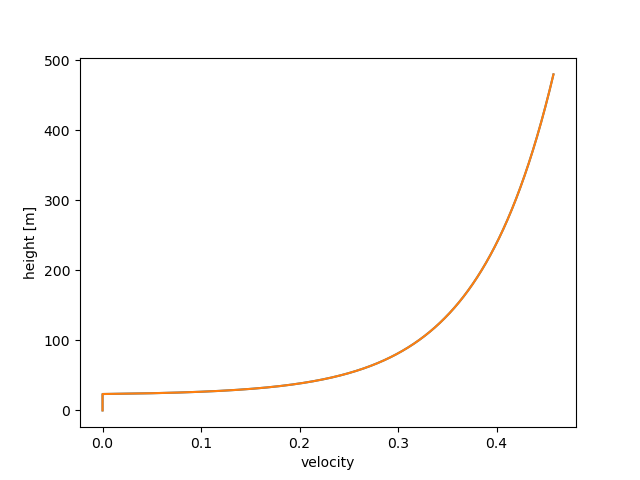

In [3]:
rho = 1.225
mu = 1.7894e-5
Re_tau = 43300
Lz =  480
hm = 20
fric_vel = Re_tau*mu/(hm*rho)

z_0 = 0.061*hm #used for convention, but really y_0
disp = 1.11*hm
shear_vel = fric_vel*np.sqrt(1-disp/Lz)
vK_const = 0.4

LES_params = {
    'uStar': shear_vel,
    'z0': z_0,
    'disp': disp,
    'vK_const': vK_const,
    'Dt': 2,
    'z_values' : np.linspace(0,Lz,Lz*10)
}
physics_setup = physics.LES_Physics(LES_params)
physics_setup.plot_log_wind()

# checking against charles code
# approximate log law mean profile
y_scaled = (LES_params['z_values']-disp)/z_0
y_scaled = np.maximum(1.0, y_scaled)
ux = (shear_vel/vK_const)*np.log(y_scaled)

plt.plot(ux, LES_params['z_values'])

In [4]:
physics_setup.calc_flatplate_quantities(
    rho = 1.224,
    mu = 1.7894e-5,
    yPlus = 500
    )


U infinity is 0.45768224669677254 with L = 480.0
flat plate Reynolds number is 15027242.29234871
wall spacing is 0.45603115286411516 for y+ of 500


In [5]:
physics_setup.LES_params['uStar']


0.03088492282600406

In [6]:
probes = probePost.Probes(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut')
probes.get_locations(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/locations')

slicing took 1 seconds
INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 4 seconds
memorizing data took 0 seconds
plotting took 4 seconds


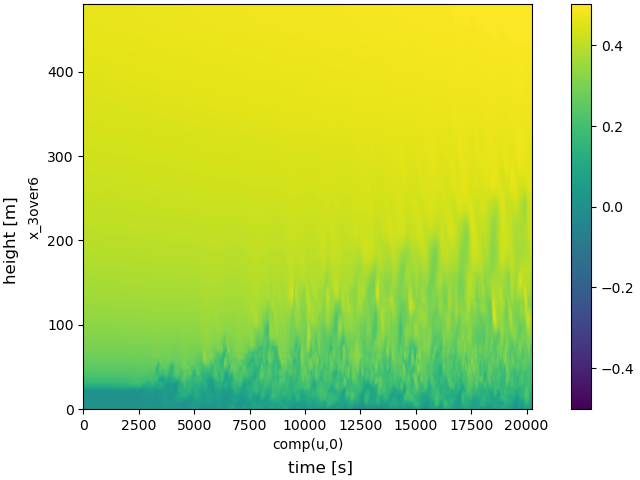

In [7]:
plot_params = {
    'plot_levels' : {
        # 'comp(u,0)' : np.linspace(0,.5,256),
        # 'comp(u,2)' : np.linspace(-1,1,256)
    },
    'horizontal spacing' : physics_setup.LES_params['Dt'],
    'stack span' : 'y',
    'xlabel': 'time [s]',
    'ylabel' : 'height [m]',
    'ColorNorm': 'Centered'
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(
    names = ['x_3over6'], 
    steps = probes.probe_steps[0::10],
    quants = ['comp(u,0)'],
    parrallel = True,
    plot_params = plot_params
    )


In [8]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/velocity_contour')

FileNotFoundError: [Errno 2] No such file or directory: '/home/nbachand/Documents/Cascade/city_block/CHARLES/R2/plots/velocity_contour.png'

slicing took 1 seconds
INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 65 seconds
memorizing data took 7 seconds
processing data took 5 seconds
plotting took 37 seconds


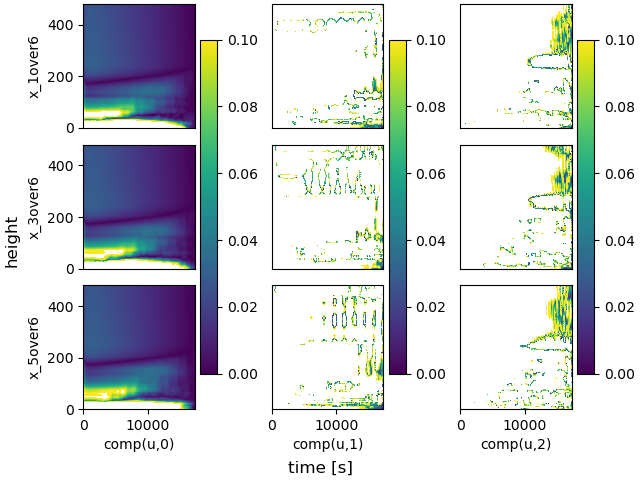

In [16]:
plot_params = {
    'plot_levels' : {
        'comp(u,0)' : np.linspace(0,.1,200),
        'comp(u,1)' : np.linspace(0,.1,200),
        'comp(u,2)' : np.linspace(0,.1,200)
    },
    'horizontal spacing' : physics_setup.LES_params['Dt'],
    'stack span' : 'y',
    'xlabel': 'time [s]',
    'ylabel' : 'height',
    'plot_every': 10
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(
    # names = ['x_1over6','x_3over6'], 
    steps = probes.probe_steps[:-10],
#     quants = ['comp(u,0)', 'comp(u,1)'],
    parrallel = True,
    processing = [probePost.mean_convergence],
    plot_params = plot_params
    )

In [9]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/velocity_convergence')

slicing took 1 seconds
INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 9 seconds
memorizing data took 1 seconds


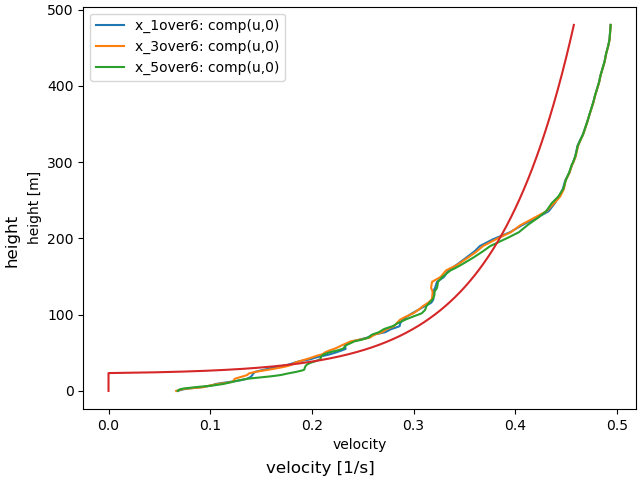

In [15]:
probes.profile_plots(
    # names = ['x_3over6'],
    steps = probes.probe_steps[-1000:-10],
    quants = ['comp(u,0)'],
    plot_params = {
        'stack span' : 'y',
        'xlabel': 'velocity [1/s]',
        'ylabel' : 'height'
        },
    parrallel=True
    )

physics_setup.plot_log_wind()

In [27]:
!$PYCASCADE_PATH/png2video.py --directory ./Images --namefmt u_y2 --dt 2

Usage: which [options] [--] COMMAND [...]
Write the full path of COMMAND(s) to standard output.

  --version, -[vV] Print version and exit successfully.
  --help,          Print this help and exit successfully.
  --skip-dot       Skip directories in PATH that start with a dot.
  --skip-tilde     Skip directories in PATH that start with a tilde.
  --show-dot       Don't expand a dot to current directory in output.
  --show-tilde     Output a tilde for HOME directory for non-root.
  --tty-only       Stop processing options on the right if not on tty.
  --all, -a        Print all matches in PATH, not just the first
  --read-alias, -i Read list of aliases from stdin.
  --skip-alias     Ignore option --read-alias; don't read stdin.
  --read-functions Read shell functions from stdin.
  --skip-functions Ignore option --read-functions; don't read stdin.

Recommended use is to write the output of (alias; declare -f) to standard
input, so that which can show aliases and shell functions. See whic